In [1]:
'''Scanning a range of an area with a servo and a distance sensor'''
#Init

##IMPORTS##
from easygopigo3 import EasyGoPiGo3
from EDL_Jupyter_resources import HiddenPrints
from IPython.display import clear_output
import time
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
hiddenprints=HiddenPrints()

# Initialize easy gpg
easyGPG = EasyGoPiGo3()
# Make sure that all sensors and output devices are uncofigured to start
easyGPG.reset_all()

###SENSORS###
my_distance_sensor=easyGPG.init_distance_sensor()
my_servo = easyGPG.init_servo("SERVO1")

print('Init.')

Init.


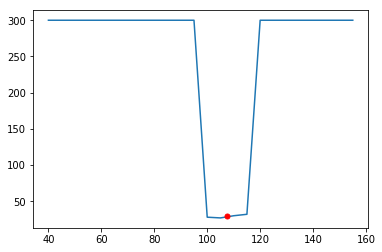

([array([29.74334584]), array([3.91578577])], array([7.89914986]))

In [83]:
def normalize_min_max(raw_data):
    
    normalized_data=np.array([])
    
    max_reading=np.max(raw_data)
    min_reading=np.min(raw_data) 

    if max_reading==min_reading:
        return []
    
    for raw_reading in raw_data:
        normalized_reading = (raw_reading - min_reading)/(max_reading-min_reading) 
        normalized_data=np.append(normalized_data,normalized_reading)
    
    return normalized_data

def scan_object(graph=False):

    ###SCAN PARAMETERS###
    scan_center=100
    scan_step=5
    scan_width=120
    zero_position=scan_center-(scan_width//2)

    ###ARRAY INIT.###
    distances=np.array([])
    angles=np.array([])

    ###SCAN###
    for i in range(scan_width//scan_step):
        #scan from right to left
        angle=zero_position+i*scan_step
        my_servo.rotate_servo(angle)
        distances=np.append(distances,my_distance_sensor.read())
        angles=np.append(angles,angle)
        time.sleep(0.01)

    ###OBJECT WIDTH CALCULATION###
    normalized_distances=normalize_min_max(distances) #normalize distance data
    if len(normalized_distances)==0:
        return([0,0],0)
    object_angles=angles[np.where(normalized_distances<0.1)] #get the angles where it 'sees the object'
    object_angular_width=np.max(object_angles)-np.min(object_angles) #calculate the width of that range of angles
    min_dist=distances[np.where(angles==object_angles[len(object_angles)//2])] #find the distance to the 'center' of the object
    object_width=2*min_dist*np.tan((object_angular_width*np.pi/180)/2) #do trig to figure out the object width
    
    ###OBJECT LOCATION CALCULATION###
    min_angle=np.average(object_angles) #min angle is center of object_angles
    object_heading=min_angle-scan_center
    dx = min_dist*np.cos((object_heading*np.pi/180)) #dx found using trig
    dy = min_dist*np.sin((object_heading*np.pi/180)) #dy found using trig (note left of bot is positive)
 
    if graph:
        plt.figure(0)
        plt.plot(angles,distances)
        plt.plot(min_angle,min_dist,marker='o', markersize=5, color="red")
        plt.show()
    
    return([dx,dy],object_width)

scan_object(graph=True)